# 2DAY -2021.02.16

### 금일 학습한 내용 

1) 인코딩 방법   

한글데이터를 불러올때 인코딩 방법을 설정해주지 않으면 오류를 만나곤 했다. 
이에, 인코딩 방법에 대해 공부를 하게 되었다. 

encoding='utf-8'
encoding='euc-kr'
encoding='cp949'

해당 데이터에 맞게 적절한 인코딩을 추가해주었다. 


2) concat, merge 복습   

3) 새로운 컬럼 추가하는 방법   

4) pipe라인 및 데이터분리하는 방법 심층복슴 완료 

# 1. 지속적으로 여러분의 포트폴리오 데이터를 랭글링 하세요

### 1) 데이터 wrangling

In [1]:
import pandas as pd

In [2]:
df_rental_time_201812_201905 = pd.read_csv(r"C:\Users\user\Documents\pandas_study\bootcamp_DS\section\section3\2day\서울특별시 공공자전거 시간대별 대여정보_201812_201905(5).csv", encoding="cp949")
df_rental_time_201906_201911 = pd.read_csv(r"C:\Users\user\Documents\pandas_study\bootcamp_DS\section\section3\2day\서울특별시 공공자전거 이용정보(시간대별)_20190601_20191130(10).csv", encoding="cp949")
df_rental_201701_201712 = pd.read_csv(r"C:\Users\user\Documents\pandas_study\bootcamp_DS\section\section3\2day\서울특별시 공공자전거 이용정보(월별)_2017_1_12.csv", encoding="cp949")
df_rental_201801_201806 = pd.read_csv(r"C:\Users\user\Documents\pandas_study\bootcamp_DS\section\section3\2day\서울특별시 공공자전거 이용정보(월별)_2018_1_6.csv", encoding="cp949")
df_rental_201912 = pd.read_csv(r"C:\Users\user\Documents\pandas_study\bootcamp_DS\section\section3\2day\공공자전거 이용정보(월별)_19.12.csv", encoding="cp949")
df_rental_201807_201812 = pd.read_csv(r"C:\Users\user\Documents\pandas_study\bootcamp_DS\section\section3\2day\서울특별시 공공자전거 이용정보(월별)_201907_201911.csv",  encoding="utf-8")
df_rental_201901_201906 = pd.read_csv(r"C:\Users\user\Documents\pandas_study\bootcamp_DS\section\section3\2day\서울특별시 공공자전거 이용정보(월별)_201901_201906.csv", encoding="cp949")
df_rental_201907_201911 = pd.read_csv(r"C:\Users\user\Documents\pandas_study\bootcamp_DS\section\section3\2day\서울특별시 공공자전거 이용정보(월별)_201807_201812.csv", encoding="utf-8")

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# csv 파일들을 프린트합니다
from glob import glob
for filename in glob('*.csv')[2:]:
    print(filename)

Challenger_Ranked_Games.csv
GrandMaster_Ranked_Games.csv
Master_Ranked_Games.csv
공공자전거 이용정보(월별)_19.12.csv
서울특별시 공공자전거 시간대별 대여정보_201812_201905(5).csv
서울특별시 공공자전거 이용정보(시간대별)_20190601_20191130(10).csv
서울특별시 공공자전거 이용정보(월별)_2017_1_12.csv
서울특별시 공공자전거 이용정보(월별)_201807_201812.csv
서울특별시 공공자전거 이용정보(월별)_2018_1_6.csv
서울특별시 공공자전거 이용정보(월별)_201901_201906.csv
서울특별시 공공자전거 이용정보(월별)_201907_201911.csv


In [4]:
# 각 파일의 shape, head를 출력하는 함수
from IPython.display import display

list = [df_rental_time_201812_201905, 
        df_rental_time_201906_201911, 
        df_rental_201701_201712, 
        df_rental_201801_201806,
        df_rental_201912, 
        df_rental_201807_201812, 
        df_rental_201901_201906, 
        df_rental_201907_201911]

def preview():
    for filename in list:

        print(filename.shape)
        display(filename.head(2))
        print('\n')

In [5]:
preview()

(428526, 12)


,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2019-05-24,9,1824,1824. 독산근린공원 입구,정기권,NaN,20대,1,11.54,0.13,550.0,2
1,2019-05-24,9,1830,1830. 빅마켓 금천점 앞,정기권,NaN,20대,1,42.74,0.33,1420.0,8




(520650, 12)


,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2019-11-16,10,415,415. DMC역 9번출구 앞,정기권,NaN,30대,1,17.96,0.17,720.0,3
1,2019-11-16,10,2110,2110. 조원동 미성아파트,정기권,NaN,30대,1,71.79,0.57,2450.0,31




(217460, 11)


,대여일자,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이동시간(분)
0,201701,503,더샵스타시티 C동 앞,정기,F,~10대,7,389.44,3.51,15130,105
1,201701,509,이마트 버스정류소 옆,정기,F,~10대,2,239.50,2.33,10080,58




(393498, 11)


,대여일자,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이동시간(분)
0,'201801','108',' 서교동 사거리','정기','F','~10대',1,179.94,1.32,5680.0,36
1,'201801','1031',' 암사동 CBIS','정기','F','~10대',4,194.39,1.93,8320.0,49




(53805, 11)


,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,이용시간
0,Dec-19,3,중랑센터,일일(회원),M,AGE_003,7,1208.87,10.11,43610,118
1,Dec-19,3,중랑센터,일일(회원),M,AGE_004,2,0,0,0,10




(336821, 11)


,대여일자,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이동시간(분)
0,2019-07,3,중랑센터,일일(회원),M,AGE_003,6,199.86,1.68,7210,87
1,2019-07,3,중랑센터,일일(회원),M,AGE_004,1,0,0,0,2




(621404, 11)


,대여일자,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이동시간(분)
0,19-Jan,3,중랑센터,일일(회원),M,AGE_003,12.0,288.87,2.25,9690.0,117.0
1,19-Jan,3,중랑센터,일일(회원),M,AGE_004,8.0,424.63,3.32,14310.0,151.0




(249516, 11)


,대여일자,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이동시간(분)
0,2018-07,3,중랑센터,일일(회원),M,AGE_003,15,1877.78,16.29,70160.0,225
1,2018-07,3,중랑센터,일일(회원),M,AGE_004,4,77.12,0.61,2650.0,75


데이터가 너무 많기 때문에 연도별로 합쳐주도록 하겠습니다.

In [6]:
df_rental_2017 = df_rental_201701_201712
df_rental_2018 = pd.concat([df_rental_201801_201806,df_rental_201807_201812])
df_rental_2019 = pd.concat([df_rental_201901_201906, df_rental_201907_201911, df_rental_201912])
df_time_2019 = pd.concat([df_rental_time_201812_201905,df_rental_time_201906_201911])

In [7]:
def preview():
    for filename in [df_rental_2017, df_rental_2018, df_rental_2019, df_time_2019]:

        print(filename.shape)
        display(filename.head(2))
        print('\n')

In [8]:
preview()

(217460, 11)


,대여일자,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이동시간(분)
0,201701,503,더샵스타시티 C동 앞,정기,F,~10대,7,389.44,3.51,15130,105
1,201701,509,이마트 버스정류소 옆,정기,F,~10대,2,239.50,2.33,10080,58




(730319, 11)


,대여일자,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이동시간(분)
0,'201801','108',' 서교동 사거리','정기','F','~10대',1,179.94,1.32,5680.0,36
1,'201801','1031',' 암사동 CBIS','정기','F','~10대',4,194.39,1.93,8320.0,49




(924725, 14)


,대여일자,대여소번호,대여소,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이동시간(분),대여소명,이동거리,이용시간
0,19-Jan,3,중랑센터,일일(회원),M,AGE_003,12.0,288.87,2.25,9690.0,117.0,NaN,NaN,NaN
1,19-Jan,3,중랑센터,일일(회원),M,AGE_004,8.0,424.63,3.32,14310.0,151.0,NaN,NaN,NaN




(949176, 12)


,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2019-05-24,9,1824,1824. 독산근린공원 입구,정기권,NaN,20대,1,11.54,0.13,550.0,2
1,2019-05-24,9,1830,1830. 빅마켓 금천점 앞,정기권,NaN,20대,1,42.74,0.33,1420.0,8


---

---

---

concat, merge를 공부하기 위해서 별도의 학습데이터를 불어와서 연습해보았습니다. 
위 자전거 데이터로 코드스테이츠에서 원하는 개념을 학습하는데는 양이 너무 방대하다 사료되어 별도의 학습데이터를 사용해보았습니다. 


## 2) concat

In [9]:
import pandas as pd 
import numpy as np


url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/car_crashes.csv"
df = pd.read_csv(url)

In [10]:
df.shape

(51, 8)

In [11]:
df1 = df.iloc[0:, 0:3]
df2 = df.iloc[0:, 2:4]
df3 = df.iloc[0:3, 0:2]

In [12]:
# concat을 사용하여 가로방향으로 더하기 
pd.concat ([df1, df2], axis=1).head()

,total,speeding,alcohol,alcohol,not_distracted
0,18.8,7.332,5.640,5.640,18.048
1,18.1,7.421,4.525,4.525,16.290
2,18.6,6.510,5.208,5.208,15.624
3,22.4,4.032,5.824,5.824,21.056
4,12.0,4.200,3.360,3.360,10.920


In [13]:
# merge를 사용하여 가로방향 더하기
df1.merge(df2, how="inner", on="alcohol").head()

,total,speeding,alcohol,not_distracted
0,18.8,7.332,5.640,18.048
1,18.1,7.421,4.525,16.290
2,18.6,6.510,5.208,15.624
3,18.6,6.510,5.208,15.792
4,16.8,6.552,5.208,15.624


In [14]:
# concat을 사용하여 세로방향으로 더하기
pd.concat ([df1, df2], axis=0).head()

,total,speeding,alcohol,not_distracted
0,18.8,7.332,5.640,NaN
1,18.1,7.421,4.525,NaN
2,18.6,6.510,5.208,NaN
3,22.4,4.032,5.824,NaN
4,12.0,4.200,3.360,NaN


## 3) merge

In [15]:
# 우리는 merge에 대해서 조금 더 살펴볼 필요가 있습니다. 
# merge를 이해기 위해 한시적으로 다른 데이터를 만들어 보겠습니다. 

ex_merge1 = pd.DataFrame(
    {
        "key1": ["K0", "K0", "K1", "K2"],
        "key2": ["K0", "K1", "K0", "K1"],
        "A": ["A", "1", "1", "1"],
        "B": ["B", "1", "1", "1"],
    }
)


ex_merge2 = pd.DataFrame(
    {
        "key1": ["K0", "K1", "K1", "K2"],
        "key2": ["K0", "K0", "K0", "K0"],
        "C": ["C", "0", "0", "0"],
        "D": ["D", "0", "0", "0"],
    }
)

In [16]:
ex_merge1

,key1,key2,A,B
0,K0,K0,A,B
1,K0,K1,1,1
2,K1,K0,1,1
3,K2,K1,1,1


In [17]:
ex_merge2

,key1,key2,C,D
0,K0,K0,C,D
1,K1,K0,0,0
2,K1,K0,0,0
3,K2,K0,0,0


처음으로 조금 복잡해 보이는 코드를 적어보겠습니다. 
저도 이를 이해하는데 30분이라는 귀한 시간을 투자하였습니다.  
   
  
  merge는 
무조건 pd.merge(ex_merge1, ex_emerg2을 적으면
ex_merge1에 다가 ex_merge2를 더해준다라고 생각하시면 됩니다.  
  
  
merge에게는 어떤 row와 어느 column을 병합시킬지 기준을 전달해주어야 합니다.  
  
how는 row의 기준이되며, on은 column의 기준이 됩니다  


In [18]:
# ex_merge1에 다가 ex_merge2를 더해주는데 merge1의 row 기준과 column["key1", "key2"] 기준으로 병합하자
# 위 문장을 코드로 적으면 아래 코드가 됩니다. 

pd.merge(ex_merge1, ex_merge2, how="left", on=["key1", "key2"])

# 이렇게 merge를 시키면 ex_merge1과 ex_merge2의 on을 확인하며 실행이 되다가 
# merge1의 on 값이 종료되는 시점에 맞추어 표가 합쳐집니다.  

# merge1에는 있는데 merge2에는 없는 값들은 NaN(결측치)를 출력하게 된다 
# NaN(결측치)은 값이 없다라는 걸 나타낸다고 간단히 이해하면 된다. 

,key1,key2,A,B,C,D
0,K0,K0,A,B,C,D
1,K0,K1,1,1,NaN,NaN
2,K1,K0,1,1,0,0
3,K1,K0,1,1,0,0
4,K2,K1,1,1,NaN,NaN


In [19]:
# 이번에는 how에 right를 해보겠습니다. 

pd.merge(ex_merge1, ex_merge2, how="right", on=["key1", "key2"])

# right를 주니 on 값은 merge2를 기준으로 합니다. 

,key1,key2,A,B,C,D
0,K0,K0,A,B,C,D
1,K1,K0,1,1,0,0
2,K1,K0,1,1,0,0
3,K2,K0,NaN,NaN,0,0


In [20]:
# how에는 outer와  inner도 있습니다. 같이 한번 살펴보도록 하죠!

pd.merge(ex_merge1, ex_merge2, how="outer", on=["key1", "key2"])

# 보시다시피 merge1과 merge2의 모든 row를 받아오고 데이터를 만드네요

,key1,key2,A,B,C,D
0,K0,K0,A,B,C,D
1,K0,K1,1,1,NaN,NaN
2,K1,K0,1,1,0,0
3,K1,K0,1,1,0,0
4,K2,K1,1,1,NaN,NaN
5,K2,K0,NaN,NaN,0,0


In [21]:
pd.merge(ex_merge1, ex_merge2, how="inner", on=["key1", "key2"])

# inner는 공통된 값들만 받아와서 데이터를 만드네요 

,key1,key2,A,B,C,D
0,K0,K0,A,B,C,D
1,K1,K0,1,1,0,0
2,K1,K0,1,1,0,0


# 2.새로 특징들을 만들어 보세요

어제 언급한대로 오늘은 리그오브레전드라는 게임을 통해서 상위 랭크에 위치한 게임 데이터를 불러와서 승리를 예측하는 모델을 만들어보고자 한다. 

단, 리그오브레전드에서는 red팀과 blue팀으로 나누어서 게임을 진행하기에  
우리는 모델을 두개를 만들어서 예측을 진행해보고자 한다.  

In [22]:
master = pd.read_csv(r"C:\Users\user\Documents\pandas_study\bootcamp_DS\section\section3\2day\Master_Ranked_Games.csv", encoding="utf-8")
challenger = pd.read_csv(r"C:\Users\user\Documents\pandas_study\bootcamp_DS\section\section3\2day\Challenger_Ranked_Games.csv", encoding="utf-8")
grand_master = pd.read_csv(r"C:\Users\user\Documents\pandas_study\bootcamp_DS\section\section3\2day\GrandMaster_Ranked_Games.csv", encoding="utf-8")

In [23]:
def preview():
    for filename in [master, grand_master, challenger]:

        print(filename.shape)
        display(filename.head(2))
        print('\n')

preview()

(107125, 50)


,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4227123625,1429,0,1,1,0,0,0,0,0,...,45,53831,41991,609,64,12.8,127,4,12916,26338
1,4219545724,1313,0,0,1,0,0,0,0,0,...,43,52924,39672,510,63,12.6,133,4,12252,29828




(65896, 50)


,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4241678498,2098,0,0,0,1,1,0,1,1,...,72,125866,70528,832,84,16.8,205,9,65312,88202
1,4233222221,1686,0,0,1,0,0,0,0,0,...,59,78424,58032,640,73,14.6,214,5,31415,61040




(26904, 50)


,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4247263043,1323,0,1,0,0,0,0,0,0,...,68,73016,49832,533,64,12.8,138,8,38711,60463
1,4247155821,1317,1,0,0,0,1,0,2,0,...,8,44218,37136,571,59,11.8,134,3,24829,14105


동일한 컬럼을 가지는 데이터이므로 merge보다는 concat을 통하여 데이터를 합쳐주었다.

In [24]:
df = pd.concat([grand_master, master,challenger])

중복여부를 확인하기 위해 최초의 shape를 확인하여 준다. 

In [25]:
df.shape

(199925, 50)

각각의 등급을 오르내리는 유저가 있기 때문에 당연히 중복값이 존재할 것으로 예측하였다.

In [26]:
df.duplicated(['gameId'])

0        False
1        False
2        False
3        False
4        False
         ...  
26899     True
26900    False
26901    False
26902     True
26903     True
Length: 199925, dtype: bool

데이터 수가 많기에 중복되는 데이터는 드랍하고 분석을 진행하고자 한다. 

In [27]:
df.drop_duplicates()

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4241678498,2098,0,0,0,1,1,0,1,1,...,72,125866,70528,832,84,16.8,205,9,65312,88202
1,4233222221,1686,0,0,1,0,0,0,0,0,...,59,78424,58032,640,73,14.6,214,5,31415,61040
2,4233113995,1588,1,1,1,1,0,1,2,1,...,30,62134,47408,608,63,12.6,133,5,27846,32107
3,4229230455,1126,1,0,1,0,1,0,1,0,...,13,32999,32064,461,53,10.6,92,3,23511,10775
4,4228244819,1262,1,0,0,0,1,1,3,0,...,5,35272,35372,506,54,10.8,113,2,17891,24158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26896,4034825342,2413,0,0,1,0,0,0,2,1,...,90,157258,85153,790,90,18.0,274,11,52167,104815
26897,4143231732,1797,0,0,0,0,0,0,1,0,...,80,107212,67690,577,76,15.2,194,11,29052,70107
26898,3959206670,1280,1,0,1,1,1,1,3,1,...,28,45732,37657,490,57,11.4,89,4,17334,16396
26900,4157911901,970,0,1,1,0,1,0,3,0,...,31,99837,70177,455,72,14.4,136,11,15817,50217


In [28]:
df = df.set_index("gameId")

In [29]:
df.head()

,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
gameId,,,,,,,,,,,,,,,,,,,,,
4241678498,2098,0,0,0,1,1,0,1,1,2,...,72,125866,70528,832,84,16.8,205,9,65312,88202
4233222221,1686,0,0,1,0,0,0,0,0,2,...,59,78424,58032,640,73,14.6,214,5,31415,61040
4233113995,1588,1,1,1,1,0,1,2,1,10,...,30,62134,47408,608,63,12.6,133,5,27846,32107
4229230455,1126,1,0,1,0,1,0,1,0,4,...,13,32999,32064,461,53,10.6,92,3,23511,10775
4228244819,1262,1,0,0,0,1,1,3,0,7,...,5,35272,35372,506,54,10.8,113,2,17891,24158


In [30]:
df.columns

Index(['gameDuraton', 'blueWins', 'blueFirstBlood', 'blueFirstTower',
       'blueFirstBaron', 'blueFirstDragon', 'blueFirstInhibitor',
       'blueDragonKills', 'blueBaronKills', 'blueTowerKills',
       'blueInhibitorKills', 'blueWardPlaced', 'blueWardkills', 'blueKills',
       'blueDeath', 'blueAssist', 'blueChampionDamageDealt', 'blueTotalGold',
       'blueTotalMinionKills', 'blueTotalLevel', 'blueAvgLevel',
       'blueJungleMinionKills', 'blueKillingSpree', 'blueTotalHeal',
       'blueObjectDamageDealt', 'redWins', 'redFirstBlood', 'redFirstTower',
       'redFirstBaron', 'redFirstDragon', 'redFirstInhibitor',
       'redDragonKills', 'redBaronKills', 'redTowerKills', 'redInhibitorKills',
       'redWardPlaced', 'redWardkills', 'redKills', 'redDeath', 'redAssist',
       'redChampionDamageDealt', 'redTotalGold', 'redTotalMinionKills',
       'redTotalLevel', 'redAvgLevel', 'redJungleMinionKills',
       'redKillingSpree', 'redTotalHeal', 'redObjectDamageDealt'],
      dtype='o

각 컬럼과 blue팀 승리, red팀 승리에 관련된 상관관계를 보고자 한다.  
기존이였으면 heatmap으로 보려고 했으나, 컬럼이 너무 많고  
타겟도 두개이기 때문에 아래와 같이 dataframe으로 진행하고자 한다. 

In [31]:
df.select_dtypes(['int64','float64']).corr()[['blueWins', "redWins"]]

,blueWins,redWins
gameDuraton,-0.017400,0.017400
blueWins,1.000000,-1.000000
blueFirstBlood,0.206563,-0.206563
blueFirstTower,0.465065,-0.465065
blueFirstBaron,0.366600,-0.366600
blueFirstDragon,0.271273,-0.271273
blueFirstInhibitor,0.658354,-0.658354
blueDragonKills,0.454920,-0.454920
blueBaronKills,0.353205,-0.353205
blueTowerKills,0.717463,-0.717463


데이터를 살펴보니 한쪽이 지면 한쪽이 이기기 때문에 컬럼도 반으로 줄일수 있을거 같고  
타켓도 하나로 만들 수 있을거 같은데.. 방법이 생각이 나질 않는다.

#### 당장 생각나는 방법은 불루팀 레드팀 각각의 데이터를 나누는 방법밖에..

In [45]:
list = ['gameDuraton', 'blueWins', 'blueFirstBlood', 'blueFirstTower',
       'blueFirstBaron', 'blueFirstDragon', 'blueFirstInhibitor',
       'blueDragonKills', 'blueBaronKills', 'blueTowerKills',
       'blueInhibitorKills', 'blueWardPlaced', 'blueWardkills', 'blueKills',
       'blueDeath', 'blueAssist', 'blueChampionDamageDealt', 'blueTotalGold',
       'blueTotalMinionKills', 'blueTotalLevel', 'blueAvgLevel',
       'blueJungleMinionKills', 'blueKillingSpree', 'blueTotalHeal',
       'blueObjectDamageDealt']

b_df = df[list]
b_df.head(2)

,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,...,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt
gameId,,,,,,,,,,,,,,,,,,,,,
4241678498,2098,0,0,0,1,1,0,1,1,2,...,45,101607,63447,774,80,16.0,226,3,24718,31019
4233222221,1686,0,0,1,0,0,0,0,0,2,...,30,70270,47107,601,65,13.0,136,5,20503,31788


In [47]:
from sklearn.model_selection import train_test_split
b_df, test= train_test_split(b_df, test_size=0.2, random_state=2)

In [48]:
b_df.shape, test.shape

((159940, 25), (39985, 25))

In [33]:
b_df.select_dtypes(['int64','float64']).corr()[['blueWins']]

,blueWins
gameDuraton,-0.017400
blueWins,1.000000
blueFirstBlood,0.206563
blueFirstTower,0.465065
blueFirstBaron,0.366600
blueFirstDragon,0.271273
blueFirstInhibitor,0.658354
blueDragonKills,0.454920
blueBaronKills,0.353205
blueTowerKills,0.717463


### 각 컬럼 소개 ( 레드팀도 동일 ) 

'gameDuraton'- 게임시간이며, 초단위로 구성되어 있음   
'blueWins' - 우리의 타켓   
'blueFirstBlood', - 블루팀에서 적들보다 먼저 맨 처음 적 챔피언을 죽인 경우를 말함   
'blueFirstTower', - 블루팀에서 적들보다 먼저 맨 처음 타워를 깬 경우를 말함   
'blueFirstBaron', - 첫 바론(오브젝트)를 사냥했는지를 나타내는 지표   
'blueFirstDragon', - 첫 용(오브젝트)를 사냥했는지를 나타내는 지표   
'blueFirstInhibitor', - 게임에서 연속적으로 적 챔피언을 죽인 사람을 뜻함 / ★★★  
'blueDragonKills', - 두번째 용(오브젝트)를 사냥했는지를 나타내는 지표   
'blueBaronKills', -  두번째 바론(오브젝트)를 사냥했는지를 나타내는 지표  
'blueTowerKills', - 적 타워에 들어가서 적 챔피언을 죽인경우를 말함 / ★★★★★★  
'blueInhibitorKills', - 상대편이 연속적으로 우리팀을 죽였는데 그 연속성을 끊는경우를 말함 / ★★★  
'blueWardPlaced',- 정글지대 시야를 얼마나 장악했는지  
'blueWardkills', - 정글지대 에서 적을 죽였는지  
'blueKills', - 같은 팀이 적을 죽였는지  
'blueDeath', - 같은 팀이 적에게 죽임을 당했는지   
'blueAssist', - 같은 팀이 적을 죽을때 도왔는지   
'blueChampionDamageDealt', - 서로간의 대미지 공방 정도   
'blueTotalGold', - 골드 획득정도   
'blueTotalMinionKills', - 미니언을 죽인 정도   
'blueTotalLevel',- 각 챔피언의 레벨  
'blueAvgLevel', - 블루팀의 평균 레벨   
'blueJungleMinionKills', - 정글 미니언 죽인정도  
'blueKillingSpree', - 킬에 의한 게임에 여파를 나타내는 지표 / ★★★  
'blueTotalHeal', - 힐을 얼마나 받았는지에 대한 지표  
'blueObjectDamageDealt' - 오브젝트에게 얼마나 데미지를 주었는지에 대한 지표   

게임을 어느정도 아는 사람이라면 blueWardPlaced / blueChampionDamageDealt / blueTotalMinionKills / blueTotalLevel / blueAvgLevel / blueJungleMinionKills / blueTotalHeal / blueObjectDamageDealt 컬럼은 크게 게임에 영향을 주는 정보가 아니라는 사실을 알 수가 있다. 

그러나 모르는 사람을 위해서 간단하게 설명하고자 한다. 

1. blueWardPlaced는 시야를 뜻하며 매우 중요한 지표이다. 그러나, 상위 티어에 있는 사람들은 시야를 확보하는 습관이 모두 들었기 때문에 이는 승리를 예측하는 좋은 지표가 아니다. 오히려 랭크가 떨어지는 지표로 사용될 수 있으며, 저 티어의 경우 해당 지표가 승리를 예측하는 좋은 지표로 사용될 수 있다. 
2. blueChampionDamageDealt - 챔피언들간의 데미지 공방은 챔피언을 운영하는 사람의 성향에 따라 갈린다. 호전적인 것을 좋아할 수록 데미지 교환이 많을 수 있다. 이런 혼전적인 성향이 게임을 망칠 수도 있으나, 게임을 개리하는 경향을 나타내기에 승리를 예측하는 지표로는 타당하지 않다. 
3. blueTotalMinionKills - 시야와 비슷하다. 모두 미니언을 잘먹는다.
4. blueTotalLevel, blueAvgLevel, blueJungleMinionKills - 3번과 비슷하다. 
5. blueTotalHeal - 힐러 챔피언이 대세가 아니라면 게임에 힐러 챔피언이 나올 수 없다. 고로 유용한 지표는 아니다. 한때 힐러 챔피언이 유행했을 때 사용하기 위한 지표로 넣어둔게 아닌가 싶다. 
6. blueObjectDamageDealt - 경기가 팽팽할때 사용하기 좋은 지표이다. 주도권을 누가 쥐고 있는가 누가 선공의 능력이 있는가를 나타내는 대표적인 지표이다. 


In [34]:
b_df = b_df.drop(["gameDuraton", "blueWardPlaced", "blueChampionDamageDealt", "blueTotalMinionKills", "blueTotalLevel", "blueAvgLevel", "blueJungleMinionKills", "blueTotalHeal"], axis=1)

In [35]:
b_df.head(2)

,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardkills,blueKills,blueDeath,blueAssist,blueTotalGold,blueKillingSpree,blueObjectDamageDealt
gameId,,,,,,,,,,,,,,,,,
4241678498,0,0,0,1,1,0,1,1,2,0,39,26,36,45,63447,3,31019
4233222221,0,0,1,0,0,0,0,0,2,0,26,16,31,30,47107,5,31788


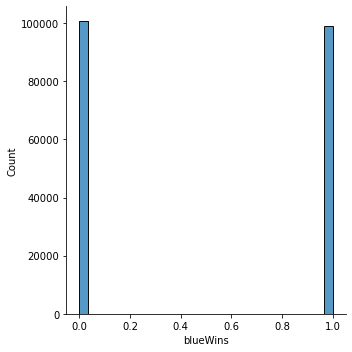

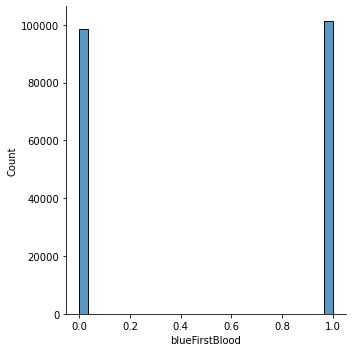

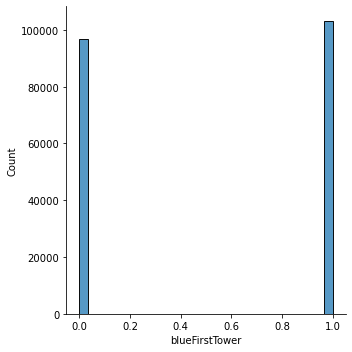

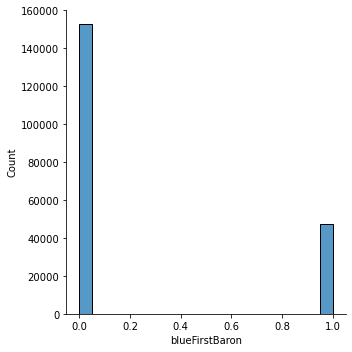

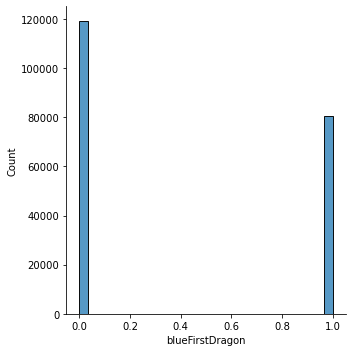

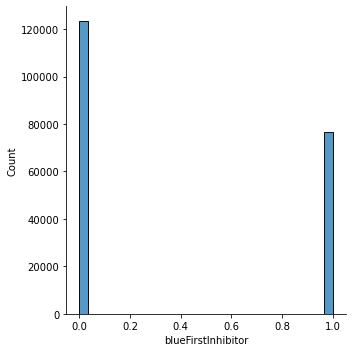

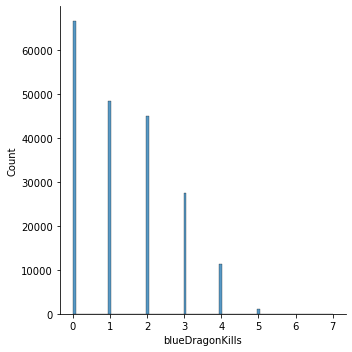

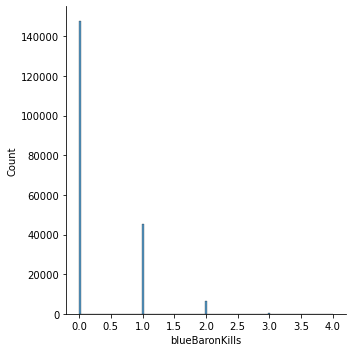

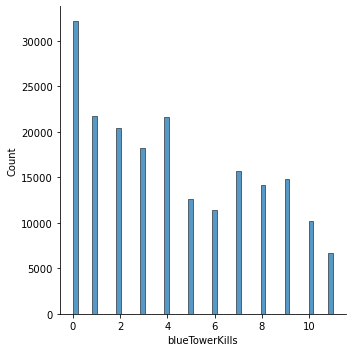

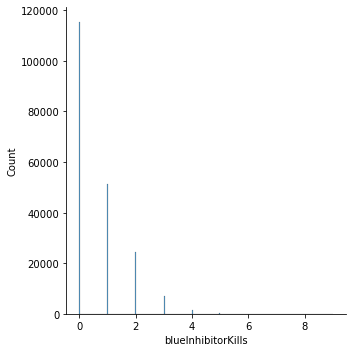

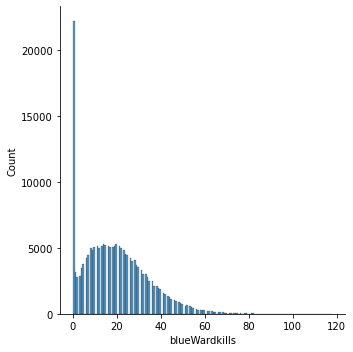

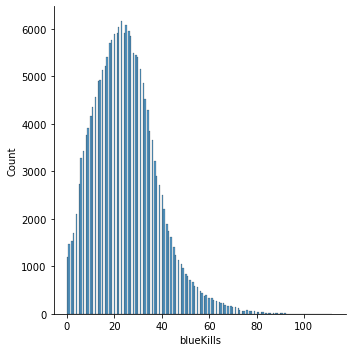

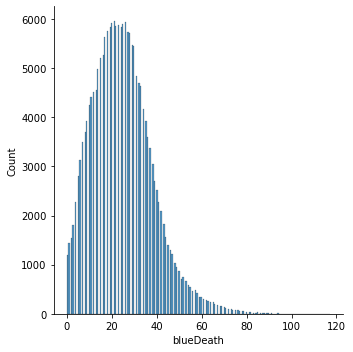

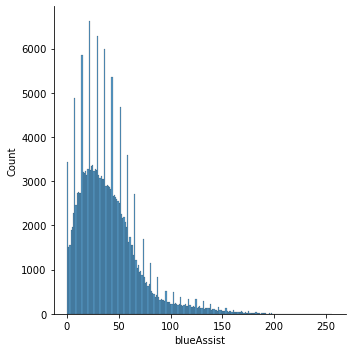

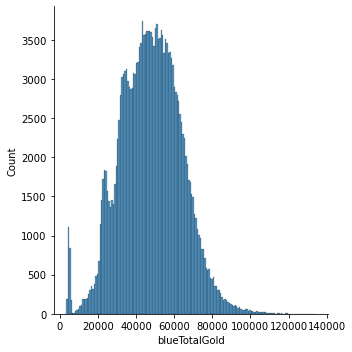

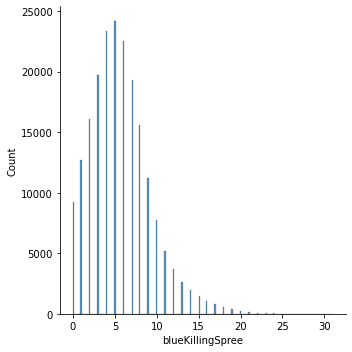

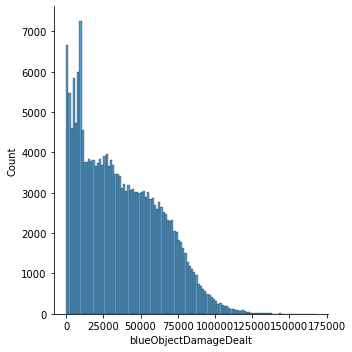

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


lists = b_df.columns
for list in lists :
    check_graph_outlier = b_df[list]
    sns.displot(check_graph_outlier);

거의 승리라는 컬럼을 만들어서 넣어줄것입니다. ( 생각처럼 왜이렇게 컬럼이 안만들어지는.. 너무 답답했습니다.. )

In [37]:
# 위 컬럼들의 승리에 대한 상관계수를 곱해준 컬럼을 하나 만들어보겠습니다.  
b_df["almost"] =  (b_df["blueFirstInhibitor"]*0.717463) + (b_df["blueTowerKills"]*0.574076) + (b_df["blueInhibitorKills"]*0.658354)
b_df.head(2)

,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,blueWardkills,blueKills,blueDeath,blueAssist,blueTotalGold,blueKillingSpree,blueObjectDamageDealt,almost
gameId,,,,,,,,,,,,,,,,,,
4241678498,0,0,0,1,1,0,1,1,2,0,39,26,36,45,63447,3,31019,1.148152
4233222221,0,0,1,0,0,0,0,0,2,0,26,16,31,30,47107,5,31788,1.148152


In [38]:
b_df.dtypes

blueWins                   int64
blueFirstBlood             int64
blueFirstTower             int64
blueFirstBaron             int64
blueFirstDragon            int64
blueFirstInhibitor         int64
blueDragonKills            int64
blueBaronKills             int64
blueTowerKills             int64
blueInhibitorKills         int64
blueWardkills              int64
blueKills                  int64
blueDeath                  int64
blueAssist                 int64
blueTotalGold              int64
blueKillingSpree           int64
blueObjectDamageDealt      int64
almost                   float64
dtype: object

# 3. (도전과제🔥) 부족하더라도 최소한의 랭글링으로 데이터를 준비하여 간단한 모델을 학습시켜 보세요

In [40]:
target = 'blueWins'



from sklearn.model_selection import train_test_split
train, val= train_test_split(b_df, test_size=0.2, random_state=2)

features = b_df.drop(columns=[target]).columns

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

In [41]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((159940, 17), (39985, 17), (159940,), (39985,))

In [42]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [43]:
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(
    StandardScaler(),
    OrdinalEncoder(), 
    SimpleImputer(),
    RandomForestRegressor(random_state=2)
)


pipe.fit(X_train, y_train)
pipe.score(X_val, y_val)

0.934147360531818

해당 결과에 대해서는 과적합이라기보다는 예측을 잘한것으로 관측된다. 
수차례 검토를 하였으나, 과적합보다는 새로만든 컬럼에 가중치로 인하여 점수가 높게 나온 것으로 예측이된다. 